In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

Function to clean up some data

In [40]:
def clean_df(football_df):

  df = football_df

  df.insert(5, 'Opp_Score', np.nan)
  df.insert(5, 'Team_Score', np.nan)
  df.insert(5, 'Game_Result', np.nan)

  for row in df.itertuples():
    index = int(row[0])
    result = str(row[5])
    slash = result.find('-')
    end_par = result.find(')')
    team_score = result[3:slash]
    opp_score = result[slash+1:end_par]

    df['Game_Result'] = df['Game_Result'].astype(str)
    df.at[index, 'Game_Result'] = result[0]
    df['Team_Score'] = df['Team_Score'].astype(str)
    df.at[index, 'Team_Score'] = team_score
    df['Opp_Score'] = df['Opp_Score'].astype(str)
    df.at[index, 'Opp_Score'] = opp_score

  df.drop('Result', axis=1, inplace=True)
  df = df.astype({'Team_Score': int, 'Opp_Score': int})
  return df


In [41]:
df = pd.read_csv('https://byu.box.com/shared/static/8arjj9k9sijfz8f93gqle5ig0lmsxxxl.csv')
df.head()

,Rk,Date,Location,Opponent,Result,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,Rushing_Att,Rushing_Yds,Rushing_Avg,Rushing_TD,Total_Plays,Total_Yds,Total_Avg,First_Downs_Pass,First_Downs_Rush,First_Downs_Pen,First_Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Head_Coach,Conference,Team_Name,Year
0,1,9/1/2007,H,Wake Forest,W (38-28),32,52,61.5,408,5,27,54,2.0,0,79,462,5.8,21,2,1,24,6,45,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007
1,2,9/8/2007,H,North Carolina State,W (37-17),15,34,44.1,142,1,39,231,5.9,3,73,373,5.1,8,10,1,19,5,40,0,1,1,Jeff Jagodzinski,ACC,boston-college,2007
2,3,9/15/2007,@,Georgia Tech,W (24-10),30,44,68.2,435,1,33,92,2.8,2,77,527,6.8,16,7,3,26,8,92,1,0,1,Jeff Jagodzinski,ACC,boston-college,2007
3,4,9/22/2007,H,Army,W (37-17),36,53,67.9,371,3,37,202,5.5,2,90,573,6.4,19,12,3,34,4,30,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007
4,5,9/29/2007,H,Massachusetts,W (24-14),24,42,57.1,204,1,37,119,3.2,2,79,323,4.1,12,9,5,26,9,65,0,0,0,Jeff Jagodzinski,ACC,boston-college,2007


In [42]:
df = clean_df(df)
df.head()

,Rk,Date,Location,Opponent,Game_Result,Team_Score,Opp_Score,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,Rushing_Att,Rushing_Yds,Rushing_Avg,Rushing_TD,Total_Plays,Total_Yds,Total_Avg,First_Downs_Pass,First_Downs_Rush,First_Downs_Pen,First_Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Head_Coach,Conference,Team_Name,Year
0,1,9/1/2007,H,Wake Forest,W,38,28,32,52,61.5,408,5,27,54,2.0,0,79,462,5.8,21,2,1,24,6,45,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007
1,2,9/8/2007,H,North Carolina State,W,37,17,15,34,44.1,142,1,39,231,5.9,3,73,373,5.1,8,10,1,19,5,40,0,1,1,Jeff Jagodzinski,ACC,boston-college,2007
2,3,9/15/2007,@,Georgia Tech,W,24,10,30,44,68.2,435,1,33,92,2.8,2,77,527,6.8,16,7,3,26,8,92,1,0,1,Jeff Jagodzinski,ACC,boston-college,2007
3,4,9/22/2007,H,Army,W,37,17,36,53,67.9,371,3,37,202,5.5,2,90,573,6.4,19,12,3,34,4,30,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007
4,5,9/29/2007,H,Massachusetts,W,24,14,24,42,57.1,204,1,37,119,3.2,2,79,323,4.1,12,9,5,26,9,65,0,0,0,Jeff Jagodzinski,ACC,boston-college,2007


In [43]:
pd.set_option('display.max_columns', None)
df.head()

,Rk,Date,Location,Opponent,Game_Result,Team_Score,Opp_Score,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,Rushing_Att,Rushing_Yds,Rushing_Avg,Rushing_TD,Total_Plays,Total_Yds,Total_Avg,First_Downs_Pass,First_Downs_Rush,First_Downs_Pen,First_Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Head_Coach,Conference,Team_Name,Year
0,1,9/1/2007,H,Wake Forest,W,38,28,32,52,61.5,408,5,27,54,2.0,0,79,462,5.8,21,2,1,24,6,45,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007
1,2,9/8/2007,H,North Carolina State,W,37,17,15,34,44.1,142,1,39,231,5.9,3,73,373,5.1,8,10,1,19,5,40,0,1,1,Jeff Jagodzinski,ACC,boston-college,2007
2,3,9/15/2007,@,Georgia Tech,W,24,10,30,44,68.2,435,1,33,92,2.8,2,77,527,6.8,16,7,3,26,8,92,1,0,1,Jeff Jagodzinski,ACC,boston-college,2007
3,4,9/22/2007,H,Army,W,37,17,36,53,67.9,371,3,37,202,5.5,2,90,573,6.4,19,12,3,34,4,30,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007
4,5,9/29/2007,H,Massachusetts,W,24,14,24,42,57.1,204,1,37,119,3.2,2,79,323,4.1,12,9,5,26,9,65,0,0,0,Jeff Jagodzinski,ACC,boston-college,2007


In [44]:
df.isna().sum()

Rk                  0
Date                0
Location            0
Opponent            0
Game_Result         0
Team_Score          0
Opp_Score           0
Passing_Cmp         0
Passing_Att         0
Passing_Pct         0
Passing_Yds         0
Passing_TD          0
Rushing_Att         0
Rushing_Yds         0
Rushing_Avg         0
Rushing_TD          0
Total_Plays         0
Total_Yds           0
Total_Avg           0
First_Downs_Pass    0
First_Downs_Rush    0
First_Downs_Pen     0
First_Downs_Tot     0
Penalties_No.       0
Penalties_Yds       0
Turnovers_Fum       0
Turnovers_Int       0
Turnovers_Tot       0
Head_Coach          0
Conference          0
Team_Name           0
Year                0
dtype: int64

In [45]:
df.dtypes

Rk                    int64
Date                 object
Location             object
Opponent             object
Game_Result          object
Team_Score            int64
Opp_Score             int64
Passing_Cmp           int64
Passing_Att           int64
Passing_Pct         float64
Passing_Yds           int64
Passing_TD            int64
Rushing_Att           int64
Rushing_Yds           int64
Rushing_Avg         float64
Rushing_TD            int64
Total_Plays           int64
Total_Yds             int64
Total_Avg           float64
First_Downs_Pass      int64
First_Downs_Rush      int64
First_Downs_Pen       int64
First_Downs_Tot       int64
Penalties_No.         int64
Penalties_Yds         int64
Turnovers_Fum         int64
Turnovers_Int         int64
Turnovers_Tot         int64
Head_Coach           object
Conference           object
Team_Name            object
Year                  int64
dtype: object

Here's some visualizations of the data, and different things. My main question is, what is most important in determining a win in a game for the past 15 years? Besides points scored, is it coaching? Conference? Yards gained? First downs? These visualizations hopefully shed a little more light into that.

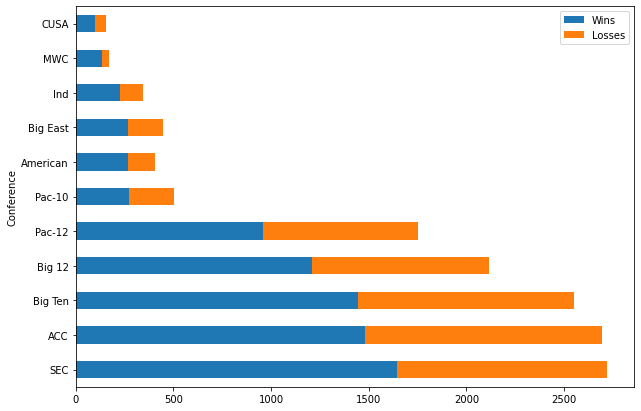

In [46]:
# wins and losses by conference

df_conference_record = pd.DataFrame(df['Conference'].unique(), columns = ['Conference'])

conference_list = df_conference_record['Conference'].tolist()
wins_list = []
losses_list = []

for conference in conference_list:
  if (conference == 'Pac-10'):
      wins_total = len(df.loc[(df['Conference'] == conference) & (df['Game_Result'] == 'W')])
  wins_total = len(df.loc[(df['Conference'] == conference) & (df['Game_Result'] == 'W')])
  wins_list.append(wins_total)
  losses_total = len(df.loc[(df['Conference'] == conference) & (df['Game_Result'] == 'L')])
  losses_list.append(losses_total)
df_conference_record['Wins'] = wins_list
df_conference_record['Losses'] = losses_list

df_conference_record = df_conference_record.sort_values(by=['Wins'], ascending=False)

barh = df_conference_record.head(25).plot(x = "Conference", y = ['Wins', 'Losses'], kind='barh', stacked = True, figsize=(10, 7))
plt.show()

What teams are there from the non-major conferences? I'll see here and add the totals to the correct conference.

In [47]:
df_cusa = df[df['Conference'] == 'CUSA'].copy()
print(df_cusa['Team_Name'].unique())

['houston' 'central-florida']


In [48]:
df_mwc = df[df['Conference'] == 'MWC'].copy()
print(df_mwc['Team_Name'].unique())

['texas-christian' 'utah' 'brigham-young']


In [49]:
df_east = df[df['Conference'] == 'Big East'].copy()
print(df_east['Team_Name'].unique())

['louisville' 'west-virginia' 'pittsburgh' 'syracuse' 'cincinnati'
 'rutgers']


In [50]:
df_american = df[df['Conference'] == 'American'].copy()
print(df_american['Team_Name'].unique())

['louisville' 'cincinnati' 'rutgers' 'houston' 'central-florida']


In [51]:
df_ind = df[df['Conference'] == 'Ind'].copy()
print(df_ind['Team_Name'].unique())

['brigham-young' 'notre-dame']


Just because it's fun, here's a list of the teams that have made the jump to P5 (and Notre Dame, as they get priority status despite being independent)

In [52]:
teams_list = list(df_cusa['Team_Name'].unique()) + list(df_mwc['Team_Name'].unique()) + list(df_east['Team_Name'].unique()) + list(df_ind['Team_Name'].unique()) + list(df_east['Team_Name'].unique())
df_new_teams = pd.DataFrame(teams_list, columns=['Teams']).drop_duplicates()
df_new_teams

,Teams
0,houston
1,central-florida
2,texas-christian
3,utah
4,brigham-young
5,louisville
6,west-virginia
7,pittsburgh
8,syracuse
9,cincinnati


Back to the task at hand, adding the extra conferences where they belong to their future conference (ind will be changed to ND). Since I'm a football fan, I know which conference each school is going or went to and will change the df to reflect that for these visualizations.

In [53]:
df_conference = df.copy()

df_conference.loc[((df_conference['Team_Name'] == 'brigham-young') & (df_conference['Conference'] == 'Ind')), 'Conference'] = 'Big 12'
df_conference.loc[((df_conference['Team_Name'] == 'brigham-young') & (df_conference['Conference'] == 'MWC')), 'Conference'] = 'Big 12'

df_conference.loc[((df_conference['Team_Name'] == 'houston') & (df_conference['Conference'] == 'CUSA')), 'Conference'] = 'Big 12'
df_conference.loc[((df_conference['Team_Name'] == 'houston') & (df_conference['Conference'] == 'American')), 'Conference'] = 'Big 12'

df_conference.loc[((df_conference['Team_Name'] == 'central-florida') & (df_conference['Conference'] == 'CUSA')), 'Conference'] = 'Big 12'
df_conference.loc[((df_conference['Team_Name'] == 'central-florida') & (df_conference['Conference'] == 'American')), 'Conference'] = 'Big 12'

df_conference.loc[((df_conference['Team_Name'] == 'texas-christian') & (df_conference['Conference'] == 'MWC')), 'Conference'] = 'Big 12'

df_conference.loc[((df_conference['Team_Name'] == 'utah') & (df_conference['Conference'] == 'MWC')), 'Conference'] = 'Pac-12'

df_conference.loc[((df_conference['Team_Name'] == 'louisville') & (df_conference['Conference'] == 'Big East')), 'Conference'] = 'ACC'
df_conference.loc[((df_conference['Team_Name'] == 'louisville') & (df_conference['Conference'] == 'American')), 'Conference'] = 'ACC'

df_conference.loc[((df_conference['Team_Name'] == 'west-virginia') & (df_conference['Conference'] == 'Big East')), 'Conference'] = 'Big 12'

df_conference.loc[((df_conference['Team_Name'] == 'pittsburgh') & (df_conference['Conference'] == 'Big East')), 'Conference'] = 'ACC'

df_conference.loc[((df_conference['Team_Name'] == 'syracuse') & (df_conference['Conference'] == 'Big East')), 'Conference'] = 'ACC'

df_conference.loc[((df_conference['Team_Name'] == 'cincinnati') & (df_conference['Conference'] == 'Big East')), 'Conference'] = 'Big 12'
df_conference.loc[((df_conference['Team_Name'] == 'cincinnati') & (df_conference['Conference'] == 'American')), 'Conference'] = 'Big 12'

df_conference.loc[((df_conference['Team_Name'] == 'rutgers') & (df_conference['Conference'] == 'Big East')), 'Conference'] = 'Big Ten'
df_conference.loc[((df_conference['Team_Name'] == 'rutgers') & (df_conference['Conference'] == 'American')), 'Conference'] = 'Big Ten'


In [54]:
df_conference.loc[df_conference['Conference'] == 'Pac-10'] = 'Pac-12'

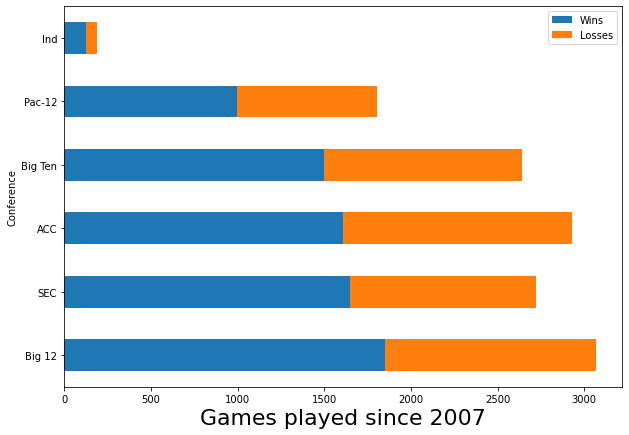

In [55]:
df_conference_record = pd.DataFrame(df_conference['Conference'].unique(), columns = ['Conference'])

conference_list = df_conference_record['Conference'].tolist()
wins_list = []
losses_list = []

for conference in conference_list:
  wins_total = len(df_conference.loc[(df_conference['Conference'] == conference) & (df_conference['Game_Result'] == 'W')])
  wins_list.append(wins_total)
  losses_total = len(df_conference.loc[(df_conference['Conference'] == conference) & (df_conference['Game_Result'] == 'L')])
  losses_list.append(losses_total)
df_conference_record['Wins'] = wins_list
df_conference_record['Losses'] = losses_list

df_conference_record = df_conference_record.sort_values(by=['Wins'], ascending=False)

barh = df_conference_record.head(25).plot(x = "Conference", y = ['Wins', 'Losses'], kind='barh', stacked = True, figsize=(10, 7))
plt.xlabel("Games played since 2007", fontsize = 22)
plt.show()

Hooray! The Big 12 has the most combined wins (skewed, obviously, since the 4 teams joining the league have been winning against easier competetition). I want to know which features have the biggest impact on predicting a win, and once I determine that, I'll run analysis on the Big 12 specifically to see if that holds up.

Firstly, I want to see which numerical features impact and predict team score the most

In [56]:
# copying the df because I may make some changes

df2 = df.copy()

y = df2.Team_Score

X = df2[['Passing_Cmp', 'Passing_Att', 'Passing_Pct', 'Passing_Yds', 'Rushing_Att', 
         'Rushing_Yds', 'Rushing_Avg', 'Total_Plays', 'Total_Yds',
         'First_Downs_Pass', 'First_Downs_Rush', 'First_Downs_Pen',         
         'Penalties_No.', 'Turnovers_Fum', 'Turnovers_Int',         
          'Turnovers_Tot']].assign(const = 1)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Team_Score   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2400.
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:38:50   Log-Likelihood:                -48881.
No. Observations:               13862   AIC:                         9.779e+04
Df Residuals:                   13848   BIC:                         9.790e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Passing_Cmp          0.0328      0.061  

In [57]:
# removing averages and some other features I don't think should be in here.

df3 = df.copy()

y = df3.Team_Score

X = df3[['Passing_Cmp', 'Passing_Att', 'Passing_Yds', 'Rushing_Att', 
         'Rushing_Yds', 'Total_Plays', 'Total_Yds',
         'First_Downs_Pen',         
         'Penalties_No.', 'Turnovers_Fum', 'Turnovers_Int']].assign(const = 1)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# dig into the total plays, graphing the scatterplot of scores vs plays

                            OLS Regression Results                            
Dep. Variable:             Team_Score   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     3448.
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:38:50   Log-Likelihood:                -48908.
No. Observations:               13862   AIC:                         9.784e+04
Df Residuals:                   13852   BIC:                         9.791e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Passing_Cmp         0.2874      0.025     

In [58]:
# just picking the features I think are most important (I only want 3-4)

df4 = df.copy()

y = df4.Team_Score

X = df4[['Passing_Yds', 'Rushing_Yds', 'Total_Plays', 'Total_Yds']].assign(const = 1)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Team_Score   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     8716.
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:38:50   Log-Likelihood:                -49708.
No. Observations:               13862   AIC:                         9.942e+04
Df Residuals:                   13858   BIC:                         9.945e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Passing_Yds     0.0269      0.001     45.812      

Super interesting, as total plays go up, the total points scored goes down. (per coefficient)

In [59]:
df4['predicted_team_score'] = results.fittedvalues

df4.head()

,Rk,Date,Location,Opponent,Game_Result,Team_Score,Opp_Score,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,Rushing_Att,Rushing_Yds,Rushing_Avg,Rushing_TD,Total_Plays,Total_Yds,Total_Avg,First_Downs_Pass,First_Downs_Rush,First_Downs_Pen,First_Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Head_Coach,Conference,Team_Name,Year,predicted_team_score
0,1,9/1/2007,H,Wake Forest,W,38,28,32,52,61.5,408,5,27,54,2.0,0,79,462,5.8,21,2,1,24,6,45,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007,30.904008
1,2,9/8/2007,H,North Carolina State,W,37,17,15,34,44.1,142,1,39,231,5.9,3,73,373,5.1,8,10,1,19,5,40,0,1,1,Jeff Jagodzinski,ACC,boston-college,2007,26.998113
2,3,9/15/2007,@,Georgia Tech,W,24,10,30,44,68.2,435,1,33,92,2.8,2,77,527,6.8,16,7,3,26,8,92,1,0,1,Jeff Jagodzinski,ACC,boston-college,2007,38.649373
3,4,9/22/2007,H,Army,W,37,17,36,53,67.9,371,3,37,202,5.5,2,90,573,6.4,19,12,3,34,4,30,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007,41.930267
4,5,9/29/2007,H,Massachusetts,W,24,14,24,42,57.1,204,1,37,119,3.2,2,79,323,4.1,12,9,5,26,9,65,0,0,0,Jeff Jagodzinski,ACC,boston-college,2007,18.275793


Now I've gotten some stats on weights factoring on points scored, I want to do more on the categorical variables and predict a W or L

In [60]:
df_dummies = df.copy()
df_dummies = pd.get_dummies(df_dummies, columns=['Location'], prefix='Location', drop_first=True)
df_dummies = pd.get_dummies(df_dummies, columns=['Game_Result'], prefix='Game_Result', drop_first=True)

df_dummies.head()

,Rk,Date,Opponent,Team_Score,Opp_Score,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,Rushing_Att,Rushing_Yds,Rushing_Avg,Rushing_TD,Total_Plays,Total_Yds,Total_Avg,First_Downs_Pass,First_Downs_Rush,First_Downs_Pen,First_Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Head_Coach,Conference,Team_Name,Year,Location_H,Location_N,Game_Result_W
0,1,9/1/2007,Wake Forest,38,28,32,52,61.5,408,5,27,54,2.0,0,79,462,5.8,21,2,1,24,6,45,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1
1,2,9/8/2007,North Carolina State,37,17,15,34,44.1,142,1,39,231,5.9,3,73,373,5.1,8,10,1,19,5,40,0,1,1,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1
2,3,9/15/2007,Georgia Tech,24,10,30,44,68.2,435,1,33,92,2.8,2,77,527,6.8,16,7,3,26,8,92,1,0,1,Jeff Jagodzinski,ACC,boston-college,2007,0,0,1
3,4,9/22/2007,Army,37,17,36,53,67.9,371,3,37,202,5.5,2,90,573,6.4,19,12,3,34,4,30,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1
4,5,9/29/2007,Massachusetts,24,14,24,42,57.1,204,1,37,119,3.2,2,79,323,4.1,12,9,5,26,9,65,0,0,0,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1


In [61]:
y = df_dummies.Game_Result_W

X = df_dummies[['Passing_Cmp', 'Passing_Att', 'Passing_Pct', 'Passing_Yds', 'Rushing_Att', 
         'Rushing_Yds', 'Rushing_Avg', 'Total_Plays', 'Total_Yds',
         'First_Downs_Pass', 'First_Downs_Pen',          
         'Penalties_No.', 'Turnovers_Fum', 'Turnovers_Int',         
          'Turnovers_Tot', 'Location_H', 'Location_N']].assign(const = 1)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Game_Result_W   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     701.3
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:38:50   Log-Likelihood:                -6179.6
No. Observations:               13862   AIC:                         1.239e+04
Df Residuals:                   13847   BIC:                         1.250e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Passing_Cmp          0.0189      0.003  

In [62]:
df_win_predicted = df_dummies.copy()

df_win_predicted['predicted_W'] = results.fittedvalues

df_win_predicted.head(100)

,Rk,Date,Opponent,Team_Score,Opp_Score,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,Rushing_Att,Rushing_Yds,Rushing_Avg,Rushing_TD,Total_Plays,Total_Yds,Total_Avg,First_Downs_Pass,First_Downs_Rush,First_Downs_Pen,First_Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Head_Coach,Conference,Team_Name,Year,Location_H,Location_N,Game_Result_W,predicted_W
0,1,9/1/2007,Wake Forest,38,28,32,52,61.5,408,5,27,54,2.0,0,79,462,5.8,21,2,1,24,6,45,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1,0.292302
1,2,9/8/2007,North Carolina State,37,17,15,34,44.1,142,1,39,231,5.9,3,73,373,5.1,8,10,1,19,5,40,0,1,1,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1,0.458888
2,3,9/15/2007,Georgia Tech,24,10,30,44,68.2,435,1,33,92,2.8,2,77,527,6.8,16,7,3,26,8,92,1,0,1,Jeff Jagodzinski,ACC,boston-college,2007,0,0,1,0.626461
3,4,9/22/2007,Army,37,17,36,53,67.9,371,3,37,202,5.5,2,90,573,6.4,19,12,3,34,4,30,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1,0.577012
4,5,9/29/2007,Massachusetts,24,14,24,42,57.1,204,1,37,119,3.2,2,79,323,4.1,12,9,5,26,9,65,0,0,0,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1,0.481778
5,6,10/6/2007,Bowling Green State,55,24,25,34,73.5,325,4,35,146,4.2,1,69,471,6.8,12,13,1,26,3,33,1,0,1,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1,0.820101
6,7,10/13/2007,Notre Dame,27,14,32,49,65.3,291,2,34,168,4.9,2,83,459,5.5,15,5,1,21,15,131,0,1,1,Jeff Jagodzinski,ACC,boston-college,2007,0,0,1,0.451694
7,8,10/25/2007,Virginia Tech,14,10,25,53,47.2,285,2,18,32,1.8,0,71,317,4.5,14,3,2,19,9,83,0,2,2,Jeff Jagodzinski,ACC,boston-college,2007,0,0,1,-0.240736
8,9,11/3/2007,Florida State,17,27,26,53,49.1,415,2,21,63,3.0,0,74,478,6.5,14,5,1,20,8,121,1,3,4,Jeff Jagodzinski,ACC,boston-college,2007,1,0,0,-0.019013
9,10,11/10/2007,Maryland,35,42,33,56,58.9,421,3,27,45,1.7,2,83,466,5.6,23,2,2,27,6,45,0,2,2,Jeff Jagodzinski,ACC,boston-college,2007,0,0,0,0.185882


In [63]:
pd.set_option('display.max_rows', None)

df_win_predicted.head(100)

,Rk,Date,Opponent,Team_Score,Opp_Score,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,Rushing_Att,Rushing_Yds,Rushing_Avg,Rushing_TD,Total_Plays,Total_Yds,Total_Avg,First_Downs_Pass,First_Downs_Rush,First_Downs_Pen,First_Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Head_Coach,Conference,Team_Name,Year,Location_H,Location_N,Game_Result_W,predicted_W
0,1,9/1/2007,Wake Forest,38,28,32,52,61.5,408,5,27,54,2.0,0,79,462,5.8,21,2,1,24,6,45,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1,0.292302
1,2,9/8/2007,North Carolina State,37,17,15,34,44.1,142,1,39,231,5.9,3,73,373,5.1,8,10,1,19,5,40,0,1,1,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1,0.458888
2,3,9/15/2007,Georgia Tech,24,10,30,44,68.2,435,1,33,92,2.8,2,77,527,6.8,16,7,3,26,8,92,1,0,1,Jeff Jagodzinski,ACC,boston-college,2007,0,0,1,0.626461
3,4,9/22/2007,Army,37,17,36,53,67.9,371,3,37,202,5.5,2,90,573,6.4,19,12,3,34,4,30,1,2,3,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1,0.577012
4,5,9/29/2007,Massachusetts,24,14,24,42,57.1,204,1,37,119,3.2,2,79,323,4.1,12,9,5,26,9,65,0,0,0,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1,0.481778
5,6,10/6/2007,Bowling Green State,55,24,25,34,73.5,325,4,35,146,4.2,1,69,471,6.8,12,13,1,26,3,33,1,0,1,Jeff Jagodzinski,ACC,boston-college,2007,1,0,1,0.820101
6,7,10/13/2007,Notre Dame,27,14,32,49,65.3,291,2,34,168,4.9,2,83,459,5.5,15,5,1,21,15,131,0,1,1,Jeff Jagodzinski,ACC,boston-college,2007,0,0,1,0.451694
7,8,10/25/2007,Virginia Tech,14,10,25,53,47.2,285,2,18,32,1.8,0,71,317,4.5,14,3,2,19,9,83,0,2,2,Jeff Jagodzinski,ACC,boston-college,2007,0,0,1,-0.240736
8,9,11/3/2007,Florida State,17,27,26,53,49.1,415,2,21,63,3.0,0,74,478,6.5,14,5,1,20,8,121,1,3,4,Jeff Jagodzinski,ACC,boston-college,2007,1,0,0,-0.019013
9,10,11/10/2007,Maryland,35,42,33,56,58.9,421,3,27,45,1.7,2,83,466,5.6,23,2,2,27,6,45,0,2,2,Jeff Jagodzinski,ACC,boston-college,2007,0,0,0,0.185882


In [64]:
w_correct = 0
l_correct = 0
w_incorrect = 0
l_incorrect = 0

for row in df_win_predicted.itertuples():
  if df_win_predicted.loc[row[0], 'predicted_W'] >= 0.5:
    if df_win_predicted.loc[row[0], 'Game_Result_W'] == 1:
      w_correct+=1
    else:
      w_incorrect+=1
  if df_win_predicted.loc[row[0], 'predicted_W'] < 0.5:
    if df_win_predicted.loc[row[0], 'Game_Result_W'] == 0:
      l_correct+=1
    else:
      l_incorrect+=1

print(f'{w_correct + l_correct} correct predictions, {w_incorrect + l_incorrect} incorrect predictions')
print(f'{(w_correct + l_correct) / len(df_dummies.index)} accuracy score')
# check accuracy (correct predictions over total cases)
# test 80%, leave 20% unchanged and compare the result

11213 correct predictions, 2649 incorrect predictions
0.8089020343384793 accuracy score


In [65]:
#this code is from an earlier project I've done. I don't understand as well as I should what's going on.




df_train = df_win_predicted.copy()

df_train.drop(columns=['Team_Name',	'Year', 'Rk',	'Date',	'Opponent', 'predicted_W', 'Team_Score', 'Opp_Score', 'Head_Coach', 'Conference'], inplace=True) # I need to drop the predicted column, right?

y = df_train['Game_Result_W'] # Label
X = df_train.drop(columns=['Game_Result_W'])

#Do I need to drop the game_result from the variables? I think so, but need to double check

clf = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345) # 70% training and 30% test

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the labels for test dataset
y_pred = clf.predict(X_test)

# View the predicted versus actual in a DataFrame
output_df = pd.DataFrame({'Actual Result': y_test, 'Predicted Result': y_pred})

print(output_df.head(30))

# Accuracy  = (true positives + true negatives) / (total cases); ranges from 0 (worst) to 1 (best)
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")


       Actual Result  Predicted Result
536                0                 0
13450              1                 1
10246              0                 0
3045               1                 1
10125              0                 0
6813               1                 1
4637               0                 0
9403               1                 0
902                1                 1
4109               1                 1
1277               0                 0
4841               0                 0
3893               1                 1
2516               0                 0
3461               1                 1
12335              0                 0
3126               1                 1
12711              0                 0
2838               1                 1
469                1                 1
3412               1                 1
3418               0                 0
3538               0                 0
11262              0                 0
6404               1     

In [66]:
output_df.head(25)

,Actual Result,Predicted Result
536,0,0
13450,1,1
10246,0,0
3045,1,1
10125,0,0
6813,1,1
4637,0,0
9403,1,0
902,1,1
4109,1,1


Now I'm normalizing the features to scale

In [67]:
df_numerical = df_dummies

df_numerical.drop(columns=['Rk', 'Date', 'Opponent', 'Team_Name',	'Year', 'Head_Coach', 'Conference'], inplace=True)

df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_numerical), columns=df_numerical.columns)
df_zscore.head()

,Team_Score,Opp_Score,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,Rushing_Att,Rushing_Yds,Rushing_Avg,Rushing_TD,Total_Plays,Total_Yds,Total_Avg,First_Downs_Pass,First_Downs_Rush,First_Downs_Pen,First_Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Location_H,Location_N,Game_Result_W
0,0.546333,0.200601,1.727669,1.940490,0.105452,1.781814,2.352712,-1.155280,-1.278611,-1.265674,-1.176425,0.840047,0.460750,0.008682,2.405315,-1.665407,-0.438459,0.496051,-0.013791,-0.283550,0.355540,1.136847,1.084065,0.959276,-0.295323,0.856135
1,0.478931,-0.580383,-0.608251,0.183867,-1.404503,-0.998616,-0.530040,0.101243,0.691049,0.896720,0.799136,0.270585,-0.277263,-0.448679,-0.569689,0.237758,-0.438459,-0.357083,-0.369122,-0.470033,-0.821835,0.121645,-0.440854,0.959276,-0.295323,0.856135
2,-0.397292,-1.077372,1.452855,1.159769,0.686871,2.064038,-0.530040,-0.527019,-0.855746,-0.822106,0.140616,0.650227,0.999748,0.662056,1.261082,-0.475929,1.018377,0.837304,0.696872,1.469388,0.355540,-0.893556,-0.440854,-1.042453,-0.295323,0.856135
3,0.478931,-0.580383,2.277297,2.038080,0.660838,1.395063,0.911336,-0.108177,0.368337,0.674936,0.140616,1.884061,1.381193,0.400706,1.947622,0.713550,1.018377,2.202318,-0.724453,-0.842998,0.355540,1.136847,1.084065,0.959276,-0.295323,0.856135
4,-0.397292,-0.793378,0.628413,0.964588,-0.276376,-0.350545,-0.530040,-0.108177,-0.555289,-0.600322,0.140616,0.840047,-0.691877,-1.102053,0.345697,-0.000137,2.475214,0.837304,1.052203,0.462381,-0.821835,-0.893556,-1.203313,0.959276,-0.295323,0.856135


In [68]:
#whoops, need to drop out predicted_team_score
# df_zscore.drop(columns=['predicted_team_score'], inplace=True)

In [69]:
# df_zscore.drop(columns=['predicted_W'], inplace=True)

y = df_zscore.Game_Result_W

X = df_zscore.drop(columns=['Game_Result_W']).assign(const=1)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Game_Result_W   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1125.
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:38:51   Log-Likelihood:                -12562.
No. Observations:               13862   AIC:                         2.517e+04
Df Residuals:                   13839   BIC:                         2.534e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Team_Score           0.5452      0.016  

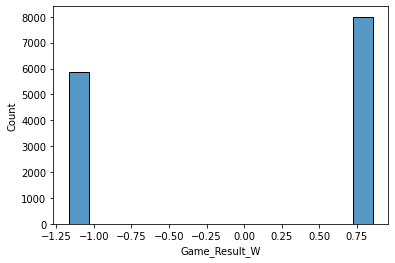

In [70]:
sns.histplot(y)

In [71]:
#dropping the extra columns again here, need to fix
# df_numerical.drop(columns=['predicted_W', 'predicted_team_score'], inplace=True)

df_minmax_score = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_numerical), columns=df_numerical.columns)
df_minmax_score.head()

,Team_Score,Opp_Score,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,Rushing_Att,Rushing_Yds,Rushing_Avg,Rushing_TD,Total_Plays,Total_Yds,Total_Avg,First_Downs_Pass,First_Downs_Rush,First_Downs_Pen,First_Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Location_H,Location_N,Game_Result_W
0,0.452381,0.337349,0.551724,0.579545,0.615,0.555858,0.555556,0.253165,0.165035,0.235294,0.000000,0.551724,0.518214,0.400000,0.65625,0.064516,0.1,0.511628,0.260870,0.209302,0.166667,0.285714,0.333333,1.0,0.0,1.0
1,0.440476,0.204819,0.258621,0.375000,0.441,0.193460,0.111111,0.405063,0.412587,0.443850,0.333333,0.482759,0.413631,0.348148,0.25000,0.322581,0.1,0.395349,0.217391,0.186047,0.000000,0.142857,0.111111,1.0,0.0,1.0
2,0.285714,0.120482,0.517241,0.488636,0.682,0.592643,0.111111,0.329114,0.218182,0.278075,0.222222,0.528736,0.594595,0.474074,0.50000,0.225806,0.3,0.558140,0.347826,0.427907,0.166667,0.000000,0.111111,0.0,0.0,1.0
3,0.440476,0.204819,0.620690,0.590909,0.679,0.505450,0.333333,0.379747,0.372028,0.422460,0.222222,0.678161,0.648649,0.444444,0.59375,0.387097,0.3,0.744186,0.173913,0.139535,0.166667,0.285714,0.333333,1.0,0.0,1.0
4,0.285714,0.168675,0.413793,0.465909,0.571,0.277929,0.111111,0.379747,0.255944,0.299465,0.222222,0.551724,0.354877,0.274074,0.37500,0.290323,0.5,0.558140,0.391304,0.302326,0.000000,0.000000,0.000000,1.0,0.0,1.0


In [72]:
y = df_minmax_score.Game_Result_W

X = df_minmax_score.drop(columns=['Game_Result_W']).assign(const=1)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Game_Result_W   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1125.
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:38:52   Log-Likelihood:                -2787.3
No. Observations:               13862   AIC:                             5621.
Df Residuals:                   13839   BIC:                             5794.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Team_Score           1.5249      0.046  

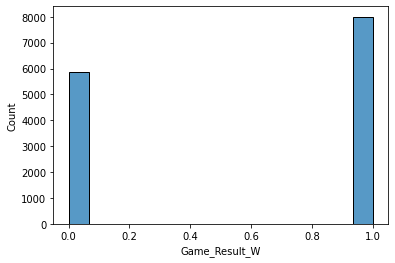

In [73]:
sns.histplot(df_minmax_score.Game_Result_W)